# IMEC2001 Herramientas Computacionales
## Semana 7: Ecuación Diferencial Ordinaria (ODE)
### Clase 14:  ODE y Dinámica

Universidad de los Andes — Septiembre 20, 2023.

---

## TABLA DE CONTENIDO

### Sección 1: ODE [→](#section1)
- 1.1. Introducción
- 1.2. Cargar Librerías
- 1.3. Sintaxis
- 1.4. Ejemplo 1: ODE
- 1.5. Ejemplo 2: Sistema de ODEs
- 1.6. Ejemplo 3: Ecuaciones de Lorenz
- 1.7. Ejemplo 4: ODE de Segundo Grado

### Sección 2: Sistemas Dinámicos [→](#section2)
- 2.1. Introducción
- 2.2. Ejemplo 1: Péndulo Simple
- 2.3. Ejemplo 2: Péndulo Simple + Fricción + Fuerza Externa
- 2.4. Ejemplo 3: Masa-Resorte
- 2.5. Ejemplo 4: Doble Masa y Doble Resorte
___

<a id="section1"></a>
# Sección 1: ODE

## 1.1. Introducción

Una ecuación diferencial ordinaria (ODE, por sus siglas en inglés) es aquella que relaciona **una única variable independiente** y una o más de sus derivadas respecto de tal variable.

¿Pero, qué es una ecuación diferencial?

<div class="alert alert-block alert-success">
Una ecuación diferencial es una ecuación matemática que relaciona una función con sus derivadas.
</div>

También, aclaremos qué es una derivada:

<div class="alert alert-block alert-success">
    
La derivada de una función es **la razón de cambio instantánea** con la que varía el valor de dicha función matemática.
</div>

Típicamente, la razón de cambio instantánea es respecto a la posición y al tiempo.

Es importante tener en cuenta que el **orden** de un ODE es **la derivada de mayor grado**. Note que es diferente al máximo exponente presente en la ecuación. Por ejemplo:

$$
\boxed{\frac{d^2y}{dx^2}} + 5 \left( \frac{dy}{dx} \right)^3 - 4y = e^x
$$

Es un ODE de **segundo grado** por el término enmarcado. Fíjese que el orden del ODE **no** lo rige el mayor exponente, que en este caso es el grado tres del segundo término.

Ahora bien, cuando trabajamos con un conjunto de ODE, podemos hacer uso de diferentes notaciones para facilitar la escritura y ser más eficientes con la comprensión del ejercicio. Las más utilizadas son:

$$
\begin{cases}
  \text{Leibniz} & \rightarrow \frac{dx}{dy} \\ 
  \\
  \text{Lagrange} & \rightarrow y' \\
  \\
  \text{Newton} & \rightarrow \dot{y}
\end{cases} 
$$

Entonces, la ecuación anterior puede ser escrita de las siguientes formas:

$$
\begin{cases}
  \text{Leibniz} & \rightarrow \frac{d^2y}{dx^2} + 5 \left( \frac{dy}{dx} \right)^3 - 4y = e^x \\ 
  \\
  \text{Lagrange} & \rightarrow y'' + 5 \left( y' \right)^3 - 4y = e^x \\
  \\
  \text{Newton} & \rightarrow \ddot{y} + 5 \left( \dot{y} \right)^3 - 4y = e^x
\end{cases} 
$$

Similar a como lo estudiamos anteriormente, a partir de un conjunto de ODE podemos conformar un sistema de ecuaciones diferenciales. En general:

<div class="alert alert-block alert-success">
Un sistema de ecuaciones diferenciales es un conjunto de varias ecuaciones diferenciales con varias funciones incógnitas y un conjunto de condiciones iniciales. Una solución es un conjunto de funciones diferenciables que satisfacen todas y cada una de las ecuaciones del sistema.
</div>

Por ejemplo:

$$
\begin{cases}
  \frac{dx}{dt} = 3x + 4y & (1)\\ 
  \\
  \frac{dy}{dt} = 5x - 7y & (2)\\
\end{cases} 
$$

En forma matricial, esto puede escribirse como:

$$
{\begin{bmatrix}
x' \\
y' \\
\end{bmatrix}} =
{\begin{bmatrix}
3 & 4 \\
5 & -7 \\
\end{bmatrix}}
{\begin{bmatrix}
x \\
y \\
\end{bmatrix}}
$$

O, de forma genérica:

$$
\frac{d}{dt}
{\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n \\
\end{bmatrix}} = 
{\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n} \\
a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \dots & a_{mn} \\
\end{bmatrix}}
{\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n \\
\end{bmatrix}} +
{\begin{bmatrix}
f_1(t) \\
f_2(t) \\
\vdots \\
f_n(t) \\
\end{bmatrix}}
$$

Existen diversos métodos analíticos para poder dar solución a estos ODE y sistemas de ecuaciones diferenciales. No obstante, aprovecharemos la librerías `scipy.integrate.odeint` para dar respuesta a estos ejercicios de manera práctica y eficiente.

<div class="alert alert-block alert-success">

Resolver ODE significa determinar **cómo cambiarán las variables a medida que pasa el tiempo**. Usualmente solo consideramos una variable independiente: el tiempo $t$.
</div>

¡Empecemos!

## 1.2. Cargar Librerías

In [4]:
# Datos y Gráficas
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sympy
from sympy.physics.mechanics import *

# ODE
from scipy import integrate

## 1.3. Sintaxis

La función `scipy.integrate.odeint` requiere tres parámetros de entrada:

1. `func`: Nombre de la función que devuelve valores derivados en los valores $y$ y $t$.
2. `y0`: Condiciones iniciales.
3. `t`: Puntos de tiempo $t$ en los que se debe informar la solución.

<div class='alert alert-block alert-info'> 

<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `scipy.integrate.odeint` dando clic [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).
</div>

## 1.4. Ejemplo 1: ODE

Se tiene la siguiente ODE:

$$
\frac{dx}{dt} = -x + \sin(t) + 3 \cos (2t)
$$

Donde:
- $x$ es la variable de estado actual.
- $t$ es el tiempo en que se evalúa.
- $x(t=0) \rightarrow x_0 = 0$ es la condición inicial.

In [2]:
# PASO 1. Definir la función f(x,t)
def ode(x, t):
    dx_dt = -x + np.sin(t) + 3*np.cos(2*t)
    return dx_dt

ode

<function __main__.ode(x, t)>

In [3]:
# PASO 2. Condiciones iniciales
condiciones_iniciales = 0
condiciones_iniciales

0

In [4]:
# PASO 3. Puntos de tiempo
start = 0
stop = 10
num = 50

tiempo = np.linspace(start, stop, num)
tiempo

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [5]:
# PASO 4. Solcionar ODE
sol = integrate.odeint(func=ode, 
                       y0=condiciones_iniciales, 
                       t=tiempo)

sol

array([[ 0.        ],
       [ 0.55719044],
       [ 0.95835252],
       [ 1.1563747 ],
       [ 1.13827552],
       [ 0.92673556],
       [ 0.57572502],
       [ 0.16097904],
       [-0.23308078],
       [-0.52779929],
       [-0.66371207],
       [-0.6107116 ],
       [-0.37326624],
       [ 0.01017917],
       [ 0.47352977],
       [ 0.93405565],
       [ 1.30628062],
       [ 1.51645113],
       [ 1.5151915 ],
       [ 1.28624447],
       [ 0.84983545],
       [ 0.26007931],
       [-0.403174  ],
       [-1.04674584],
       [-1.57877802],
       [-1.92324525],
       [-2.03197037],
       [-1.89218803],
       [-1.52842842],
       [-0.9984206 ],
       [-0.38369092],
       [ 0.22360202],
       [ 0.7354429 ],
       [ 1.08193273],
       [ 1.22218454],
       [ 1.15037569],
       [ 0.8959901 ],
       [ 0.5182405 ],
       [ 0.09561719],
       [-0.28768931],
       [-0.55623271],
       [-0.65622403],
       [-0.56477011],
       [-0.29390314],
       [ 0.11127204],
       [ 0

In [9]:
def formato_grafica(titulo, ejex, ejey, leyenda=False, xlim=[None, None], ylim=[None, None]):
    plt.rcParams['axes.axisbelow'] = True

    plt.title(titulo, fontsize=15)
    plt.ylabel(ejey, fontsize=13)
    plt.xlabel(ejex, fontsize=13)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(ylim[0], ylim[1])
    plt.xlim(xlim[0], xlim[1])
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
    
    if leyenda == True:
        plt.legend(loc='best')
    
    plt.tight_layout;

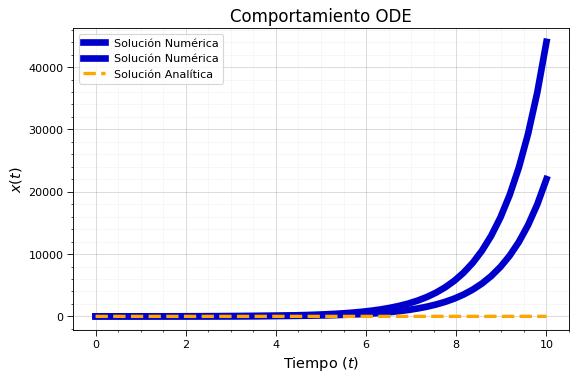

In [10]:
# Solución Analítica
def sol_an(t):
    return (1/2)*np.sin(t) - (1/2)*np.cos(t) + (3/5)*np.cos(2.0*t) + (6/5)*np.sin(2.0*t) - (1/10)*np.exp(-t)

# Gráfica
hor = 8
ver = 5
fig1 = plt.figure(figsize=(hor, ver), dpi=80)

plt.plot(tiempo, sol, linestyle='-', linewidth=6, color='mediumblue', label='Solución Numérica')
plt.plot(tiempo, sol_an(tiempo), linestyle='--', linewidth=3, color='orange', label='Solución Analítica')

formato_grafica(titulo='Comportamiento ODE', 
                ejex='Tiempo ($t$)', 
                ejey='$x(t)$',
                leyenda=True)

## 1.5. Ejemplo 2: Sistema de ODEs

Se tiene el siguiente sistema de ecuaciones diferenciales:

$$
\begin{cases}
  \frac{dx}{dt} = y - x \\ 
  \\
  \frac{dy}{dt} = 4x - y \\
\end{cases} 
$$

Donde:
- $x(t=0) \rightarrow x_0 = 2.0$
- $y(t=0) \rightarrow y_0 = 0.0$

In [5]:
# PASO 1. Definir la función f(x,t)
def ode(variables, t):
    # Variables
    x = variables[0]
    y = variables[1]
    
    # Ecuaciones
    dx_dt = y - x
    dy_dt = 4*x - y
    
    return [dx_dt, dy_dt]

ode

<function __main__.ode(variables, t)>

In [6]:
# PASO 2. Condiciones iniciales
condiciones_iniciales = [2, 0] # [x0, y0]
condiciones_iniciales

[2, 0]

In [7]:
# PASO 3. Puntos de tiempo
start = 0
stop = 10
num = 50

tiempo = np.linspace(start, stop, num)
tiempo

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [8]:
# PASO 4. Solcionar ODE
sol = integrate.odeint(func=ode, 
                       y0=condiciones_iniciales, 
                       t=tiempo)

sol

array([[2.00000000e+00, 0.00000000e+00],
       [1.76853075e+00, 1.36853155e+00],
       [1.79796031e+00, 2.42029018e+00],
       [2.00390447e+00, 3.37046155e+00],
       [2.34855619e+00, 4.35158572e+00],
       [2.82115723e+00, 5.45499319e+00],
       [3.42781794e+00, 6.75408294e+00],
       [4.18649767e+00, 8.31794019e+00],
       [5.12489539e+00, 1.02199436e+01],
       [6.28005695e+00, 1.25439328e+01],
       [7.69908289e+00, 1.53893935e+01],
       [9.44064125e+00, 1.88765268e+01],
       [1.15771725e+01, 2.31517667e+01],
       [1.41977832e+01, 2.83941687e+01],
       [1.74118977e+01, 3.48230376e+01],
       [2.13537916e+01, 4.27071723e+01],
       [2.61881828e+01, 5.23761428e+01],
       [3.21171040e+01, 6.42340872e+01],
       [3.93883399e+01, 7.87766143e+01],
       [4.83057804e+01, 9.66115253e+01],
       [5.92421192e+01, 1.18484219e+02],
       [7.26544289e+01, 1.45308847e+02],
       [8.91032638e+01, 1.78206522e+02],
       [1.09276087e+02, 2.18552172e+02],
       [1.340160

In [ ]:
# Solución Analítica
def X_an(t):
    return np.exp(t) + np.exp(-3*t)

def Y_an(t):
    return 2*np.exp(t) - 2*np.exp(-3*t)

# Gráfica
hor = 8
ver = 5
fig1 = plt.figure(figsize=(hor, ver), dpi=80)

# X
plt.plot(tiempo, sol[:,0], linestyle='-', linewidth=6, color='mediumblue', label='Sol. X Numérica')
plt.plot(tiempo, X_an(tiempo), linestyle='--', linewidth=3, color='orange', label='Sol. X Analítica')

# Y
plt.plot(tiempo, sol[:,1], linestyle='-', linewidth=6, color='darkolivegreen', label='Sol. Y Numérica')
plt.plot(tiempo, Y_an(tiempo), linestyle='--', linewidth=3, color='powderblue', label='Sol. Y Analítica')

formato_grafica(titulo='Comportamiento ODE', 
                ejex='Tiempo ($t$)', 
                ejey='$x(t)$, $y(t)$',
                leyenda=True)

## 1.6. Ejemplo 3: Ecuaciones de Lorenz

Se tiene el siguiente sistema de ecuaciones diferenciales (**[Ecuaciones de Lorenz](https://es.wikipedia.org/wiki/Atractor_de_Lorenz)**):

$$
\begin{cases}
  \frac{dx}{dt} = \sigma (y - x) \\ 
  \\
  \frac{dy}{dt} = x(\rho - z) - y \\
  \\
  \frac{dz}{dt} = xy - \beta z
\end{cases} 
$$

Donde:
**Constantes**
- $\sigma = 10.0$
- $\rho = 28.0$
- $\beta = 8/3$

**Parámetros ODE**
- $x(t=0) \rightarrow x_0 = 1.0$
- $y(t=0) \rightarrow y_0 = 0.0$
- $z(t=0) \rightarrow z_0 = 0.0$

In [ ]:
# PASO 1. Definir la función f(x,t)
def ode(variables, t, sigma, rho, beta):
    # Variables
    x = variables[0]
    y = variables[1]
    z = variables[2]
    
    # Ecuaciones
    dx_dt = sigma * (y-x)
    dy_dt = x * (rho-z) - y
    dz_dt = x*y - beta*z
    
    return [dx_dt, dy_dt, dz_dt]

ode

In [ ]:
# PASO 2. Condiciones iniciales
condiciones_iniciales = [1, 0, 0] # [x0, y0, z0]
condiciones_iniciales

In [ ]:
# PASO 3. Puntos de tiempo
start = 0
stop = 40
num = 10000

tiempo = np.linspace(start, stop, num)

In [ ]:
# PASO 4. Solcionar ODE
sigma = 10
rho = 28
beta = 8/3

sol = integrate.odeint(func=ode, 
                       y0=condiciones_iniciales, 
                       t=tiempo,
                       args=(sigma, rho, beta))

sol

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Gráfica
hor = 8
ver = 5
fig = plt.figure(figsize=(hor, ver), dpi=80)
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.plot(sol[:, 0], sol[:, 1], sol[:, 2], linestyle='-', linewidth=1, color='dodgerblue', label='Solución Numérica')

formato_grafica(titulo='Comportamiento ODE', 
                ejex='', 
                ejey='',
                leyenda=False)

## 1.7. Ejemplo 4: ODE de Segundo Grado

$$
\frac{d^2x}{dt^2} + \frac{dx}{dt} + 2x = 0
$$

Donde:
- $dx$ es la derivada de la variable de estado actual.
- $x$ es la variable de estado actual.
- $t$ es el tiempo actual.
- $x(t=0) = x_0 = 1$
- $\frac{dx}{dt}(t=0) = dx_0 = 0$

In [ ]:
# PASO 1. Definir la función f(x,t)
def ode(variables, t):
    # Variables
    x = variables[0]
    dx_dt = variables[1]
    
    # Ecuaciones
    d2x_dt2 = -dx_dt - 2*x
    
    return [dx_dt, d2x_dt2]

ode

In [ ]:
# PASO 2. Condiciones iniciales
condiciones_iniciales = [1, 0] # [x0, dx_dt0]
condiciones_iniciales

In [ ]:
# PASO 3. Puntos de tiempo
start = 0
stop = 12
num = 50

tiempo = np.linspace(start, stop, num)
tiempo

In [ ]:
# PASO 4. Solcionar ODE
sol = integrate.odeint(func=ode, 
                       y0=condiciones_iniciales, 
                       t=tiempo)

sol

In [ ]:
# Solución Analítica
def sol_an(t):
    return np.exp(-t/2) * (np.cos(np.sqrt(7) * t / 2) + np.sin(np.sqrt(7) * t / 2)/np.sqrt(7))

# Gráfica
hor = 8
ver = 5
fig1 = plt.figure(figsize=(hor, ver), dpi=80)

plt.plot(tiempo, sol[:,0], linestyle='-', linewidth=6, color='mediumblue', label='Solución Numérica')
plt.plot(tiempo, sol_an(tiempo), linestyle='--', linewidth=3, color='orange', label='Solución Analítica')

formato_grafica(titulo='Comportamiento ODE', 
                ejex='Tiempo ($t$)', 
                ejey='$x(t)$',
                leyenda=True)

<a id="section2"></a>
# Sección 2: Sistemas Dinámicos

## 2.1. Introducción

Tengamos presentes las siguientes equivalencias:

#### Movimiento Rectilíneo
$$
\begin{cases}
  v = \frac{dx}{dt} = \dot{x} \\ 
  \\
  a = \frac{dv}{dt} = \frac{d}{dt} \left( \frac{dx}{dt} \right) = \frac{d^2x}{dt^2} = \ddot{x} \\
\end{cases} 
$$

#### Movimiento Rotacional
$$
\begin{cases}
  \omega = \frac{d \theta}{dt} = \dot{\theta} \\ 
  \\
  \alpha = \frac{d \omega}{dt} = \frac{d}{dt} \left( \frac{d \theta}{dt} \right) = \frac{d^2 \theta}{dt^2} = \ddot{\theta} \\
\end{cases} 
$$

#### Generalización 2da Ley de Newton
$$
\begin{cases}
  F = ma \rightarrow F = m \ddot{x} & (1) \\ 
  \\
  T = I \alpha \rightarrow T = I \ddot{\theta} & (2) \\
\end{cases} 
$$

Siendo $F$ la fuerza, $m$ la masa, $a$ la aceleración, $T$ el torque, $I$ el momento de inercia (en nuestros casos de estudio, $I = m L^2$, siendo $L$ la longitud al punto de pivote del giro) y $\theta$ el ángulo de giro.

## 2.2. Ejemplo 1: Péndulo Simple

<img src='./img/pendulum1.png' width='300' height='300'/>

Partimos de la relación:

$$
T = I \ddot{\theta}
$$

El único componente de la masa que causa un torque en el cuerpo es:

$$
m g \sin \theta
$$

Luego:

$$
\boxed{ \ddot{\theta} + \frac{g}{L} \sin \theta = 0 }
$$

<div class='alert alert-block alert-info'> 

<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información del ejercicio dando clic [aquí](https://www.youtube.com/watch?v=8VJ1CJ55Np0) y [aquí](https://www.youtube.com/watch?v=xBBXlQ7CmFc).
</div>

Modelemos esta ODE de segundo grado para:

**Constantes**
- $g = 9.81$
- $L = 5.0$

**Parámetros ODE**
- $\theta(t=0) \rightarrow \theta_0 = 30$
- $d\omega(t=0) \rightarrow d\omega_0 = 0$
- $t_{inicial} = 0$
- $t_{final} = 200$

### 2.2.1. Derivada con `sympy.diff` y `sympy.solve`

<div class='alert alert-block alert-info'> 

<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `sympy.diff` dando clic [aquí](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html).
</div>

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `sympy.solve` dando clic [aquí](https://docs.sympy.org/latest/modules/solvers/solvers.html).
</div>

In [ ]:
g, L, t = sympy.symbols('g, L, t')

In [ ]:
theta = dynamicsymbols('theta')
theta

In [ ]:
df_theta = sympy.diff(theta, t)
df_theta

In [ ]:
dff_theta = sympy.diff(df_theta, t)
dff_theta

In [ ]:
eq = dff_theta + (g/L)*sympy.sin(theta)
eq

In [ ]:
sol = sympy.solve(eq, dff_theta)
sol[0]

### 2.2.2. Solución Numérica con `scipy.integrate.odeint`

In [ ]:
# PASO 1. Definir la función
def pendulo_simple(variables, t, g, L):
    # Variables
    theta = variables[0]
    dtheta_dt = variables[1]
    
    # Ecuaciones
    d2theta_dt2 = -(g/L) * np.sin(np.deg2rad(theta))
    
    return [dtheta_dt, d2theta_dt2]

pendulo_simple

In [ ]:
# PASO 2. Condiciones iniciales
condiciones_iniciales = [30, 0] # [x0, dx_dt0]
condiciones_iniciales

In [ ]:
# PASO 3. Puntos de tiempo
start = 0
stop = 200
num = 1000

tiempo = np.linspace(start, stop, num)
tiempo

In [ ]:
# PASO 4. Solcionar ODE
## Constantes
g = 9.81
L = 5.0

## Solución numérica
sol = integrate.odeint(func=pendulo_simple, 
                       y0=condiciones_iniciales, 
                       t=tiempo,
                       args=(g, L))

sol

In [ ]:
# Gráfica
hor = 8
ver = 5
fig1 = plt.figure(figsize=(hor, ver), dpi=80)

plt.plot(tiempo, sol[:,0], linestyle='-', linewidth=3, color='dodgerblue', label='Solución Numérica')

formato_grafica(titulo='Comportamiento ODE', 
                ejex='Tiempo ($t$)', 
                ejey='$theta(t)$',
                leyenda=False)

Partimos de la relación:

$$
T = I \ddot{\theta}
$$

El único componente de la masa que causa un torque en el cuerpo es:

$$
m g \sin \theta
$$

Luego:

$$
\boxed{ \ddot{\theta} + \frac{g}{L} \sin \theta = 0 }
$$


## 2.3. Ejemplo 2: Péndulo Simple + Fricción + Fuerza Externa

<img src='./img/pendulum2.png' width='800' height='800'/>

Este caso es una extensión al Ejemplo 1, pues:

$$
F = m a
$$

Luego:

$$
F_0 \cos(\omega t) - mg \sin(\theta) - c \frac{ds}{dt} = ma 
$$

Entonces:

$$
F_0 \cos(\omega t) = m L \ddot{\theta} + c L \dot{\theta} + mg \sin(\theta)
$$

Que se puede reescribir como:

$$
\boxed{ \ddot{\theta} + \alpha \dot{\theta} + \sin(\theta) = \gamma \cos(\beta t) }
$$

Donde:

$$
\begin{cases}
  \alpha = \frac{c}{m \omega_0} \\ 
  \\
  \beta = \frac{\omega}{\omega_0} \\
  \\
  \gamma = \frac{F_0}{m L \omega_0^2}
\end{cases} 
$$

<div class='alert alert-block alert-info'> 

<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información del ejercicio dando clic [aquí](https://www.youtube.com/watch?v=SZWn7x4g-Vo).
</div>

Modelemos esta ODE de segundo grado para:

**Constantes**
- $c = 0.5$
- $m = 2$
- $\omega_0 = 50$
- $\beta = 0.98$
- $F_0 = 150$
- $L = 8$

**Parámetros ODE**
- $x(t=0) \rightarrow x_0 = 30$
- $dx(t=0) \rightarrow dx_0 = 0$
- $t_{inicial} = 0$
- $t_{final} = 1000$

### 2.3.1. Derivada con `sympy.diff` y `sympy.solve`



In [ ]:
alpha, beta, gamma, t = sympy.symbols('alpha, beta, gamma, t')

In [ ]:
theta = dynamicsymbols('theta')
theta

In [ ]:
df_theta = sympy.diff(theta, t)
df_theta

In [ ]:
dff_theta = sympy.diff(df_theta, t)
dff_theta

In [ ]:
eq = sympy.Eq(dff_theta + alpha*df_theta + sympy.sin(theta), gamma*sympy.cos(beta*t))
eq

In [ ]:
sol = sympy.solve(eq, dff_theta)
sol[0]

### 2.3.2. Solución Numérica con `scipy.integrate.odeint`

In [ ]:
# PASO 1. Definir la función
def pendulo_friccion(variables, t, alpha, beta, gamma):
    # Variables
    theta = variables[0]
    dtheta = variables[1]
    
    # Ecuaciones
    d2theta = -alpha*dtheta - np.sin(np.deg2rad(theta)) + gamma*np.cos(np.deg2rad(beta*t))
    
    return [dtheta, d2theta]

pendulo_friccion

In [ ]:
# PASO 2. Condiciones iniciales
condiciones_iniciales = [30, 0] # [x0, dx_dt0]
condiciones_iniciales

In [ ]:
# PASO 3. Puntos de tiempo
start = 0
stop = 1000
num = 1000

tiempo = np.linspace(start, stop, num)
tiempo

In [ ]:
# PASO 4. Solcionar ODE
## Constantes
c = 0.5
m = 2.0
omega = 50.0
beta = 0.98
F = 150
L = 8.0

alpha = c / (m*omega)
gamma = F / (m*L*(omega**2))

## Solución numérica
sol = integrate.odeint(func=pendulo_friccion, 
                       y0=condiciones_iniciales, 
                       t=tiempo,
                       args=(alpha, beta, gamma))

sol

In [ ]:
# Gráfica
hor = 10
ver = 3

# Ángulo
fig = plt.figure(figsize=(hor, ver), dpi=80)

plt.plot(tiempo, sol[:,0], linestyle='-', linewidth=2, color='dodgerblue', label='Solución Numérica')

formato_grafica(titulo='', 
                ejex='Tiempo ($t$)', 
                ejey='θ (rad)',
                leyenda=False)

# Velocidad Angular
fig = plt.figure(figsize=(hor, ver), dpi=80)

plt.plot(tiempo, sol[:,1], linestyle='-', linewidth=2, color='orange', label='Solución Numérica')

formato_grafica(titulo='', 
                ejex='Tiempo ($t$)', 
                ejey='ω (rad/s)',
                leyenda=False)

## 2.4. Ejemplo 3: Masa-Resorte

<img src='./img/spring1.png' width='800' height='800'/>

El escenario de una masa-resorte parte de:

$$
F = m a = m \ddot{x}
$$

En donde se tienen los siguientes elementos presentes:

$$
\begin{cases}
  \text{Ley de Hooke} \rightarrow F_s = -k x \\ 
  \\
  \text{Fricción} \rightarrow \beta = F_f = -c \frac{dx}{dt} = -c \dot{x} \\
  \\
  \text{Fuerza Externa} \rightarrow F_e = F_0 \cos(\omega t)
\end{cases} 
$$

Luego:

$$
F_0 \cos(\omega t) - c \dot{x} - k x = m \ddot{x}
$$

Entonces:

$$
m \ddot{x} + c \dot{x} + k x = F_0 \cos(\omega t)
$$

Que se puede reescribir como:

$$
\boxed{ \ddot{x} + \alpha \dot{x} + \gamma x = \cos(\beta t) }
$$

Donde:

$$
\begin{cases}
  \alpha = \frac{c}{m \omega_0} \\ 
  \\
  \gamma = \frac{m \omega_0^2}{F_0} \\
\end{cases} 
$$

<div class='alert alert-block alert-info'> 

<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información del ejercicio dando clic [aquí](https://www.youtube.com/watch?v=gwkBOH7EClo).
</div>

### 2.4.1. Derivada con `sympy.diff` y `sympy.solve`

<div class='alert alert-block alert-info'> 

<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `sympy.diff` dando clic [aquí](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html).
</div>

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `sympy.solve` dando clic [aquí](https://docs.sympy.org/latest/modules/solvers/solvers.html).
</div>

In [ ]:
alpha, beta, gamma, t = sympy.symbols('alpha, beta, gamma, t')

In [ ]:
x = dynamicsymbols('x')
x

In [ ]:
df_x = sympy.diff(x, t)
df_x

In [ ]:
dff_x = sympy.diff(df_x, t)
dff_x

In [ ]:
eq = sympy.Eq(dff_x + alpha*df_x + gamma*x, sympy.cos(beta*t))
eq

In [ ]:
sol = sympy.solve(eq, dff_x)
sol[0]

In [ ]:
sol = sympy.dsolve(eq)
sol

### 2.4.2. Solución Numérica con `scipy.integrate.odeint`

<div class="alert alert-block alert-warning">   

**SU TURNO**

Modelemos esta ODE de segundo grado para:

**Constantes**
- $c = 100$
- $m = 4.5$
- $\omega_0 = 25$
- $\beta = 0.55$
- $F_0 = 350$

**Parámetros ODE**
- $x(t=0) \rightarrow x_0 = 10$
- $dx(t=0) \rightarrow dx_0 = 0$
- $t_{inicial} = 0$
- $t_{final} = 10$

</div>

In [ ]:
# PASO 1. Definir la función
def pendulo_resorte(variables, t, alpha, beta, gamma):
    # Variables
    x = variables[0]
    dx = variables[1]

    # Ecuaciones
    d2x = -alpha*dx - gamma*x + np.cos(np.deg2rad(beta*t))

    return [dx, d2x]

pendulo_resorte

In [ ]:
# PASO 2. Condiciones iniciales
condiciones_iniciales = [10, 0] # [x0, dx0]
condiciones_iniciales

In [ ]:
# PASO 3. Puntos de tiempo
start = 0
stop = 10
num = 50

tiempo = np.linspace(start, stop, num)
tiempo

In [ ]:
# PASO 4. Solcionar ODE
## Constantes
c = 100
m = 4.5
omega = 25
beta = 0.55
F = 350

alpha = c / (m*omega)
gamma = (m*(omega**2)) / F

## Solución numérica
sol = integrate.odeint(func=pendulo_resorte,
                       y0=condiciones_iniciales,
                       t=tiempo,
                       args=(alpha, beta, gamma))

sol

In [ ]:
# Gráfica
hor = 10
ver = 3

# Ángulo
fig = plt.figure(figsize=(hor, ver), dpi=80)

plt.plot(tiempo, sol[:,0], linestyle='-', linewidth=2, color='dodgerblue', label='Solución Numérica')

formato_grafica(titulo='Posición',
                ejex='Tiempo ($t$)',
                ejey='X (m)',
                leyenda=False)

# Velocidad Angular
fig = plt.figure(figsize=(hor, ver), dpi=80)

plt.plot(tiempo, sol[:,1], linestyle='-', linewidth=2, color='orange', label='Solución Numérica')

formato_grafica(titulo='Velocidad',
                ejex='Tiempo ($t$)',
                ejey='V (m/s)',
                leyenda=False)

## 2.5. Ejemplo 4: Doble Masa - Doble Resorte

<img src='./img/spring2.png' width='600' height='600'/>

Al igual que en el Ejemplo 5, el escenario de una masa-resorte parte de:

$$
F = m a = m \ddot{x}
$$

En donde se tiene presente la Ley de Hooke:

$$
F_s = -k x
$$

En donde:

$$
\sum F_s = m \ddot{x}
$$

Entonces:

$$
\boxed{
\begin{cases}
  m_1 \ddot{x_1} + (k_1 + k_2) x_1 - k_2 x_2 = 0 & (1) \\ 
  \\
  m_2 \ddot{x_2} + k_2 x_2 - k_2 x_1 = 0 & (2) \\
\end{cases}
}
$$

<div class='alert alert-block alert-info'> 

<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información del ejercicio dando clic [aquí](https://www.youtube.com/watch?v=dqtZwZmMh4w).
</div>

Modelemos esta ODE de segundo grado para:

**Constantes**
- $k_1 = 200$
- $k_2 = 80$
- $m_1 = 10$
- $m_2 = 20$

**Parámetros ODE**
- $x(t=0) \rightarrow x_0 = [0.025, 0.2]$
- $dx(t=0) \rightarrow dx_0 = [0, 0]$
- $t_{inicial} = 0$
- $t_{final} = 10$

### 2.5.1. Derivada con `sympy.diff` y `sympy.solve`

<div class='alert alert-block alert-info'> 

<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `sympy.diff` dando clic [aquí](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html).
</div>

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `sympy.solve` dando clic [aquí](https://docs.sympy.org/latest/modules/solvers/solvers.html).
</div>

In [ ]:
k1, k2, m1, m2, t = sympy.symbols('k_1, k_2, m_1, m_2, t')

In [ ]:
x1, x2 = sympy.symbols('x_1, x_2', cls=sympy.Function)

x1 = x1(t)
x2 = x2(t)

In [ ]:
# X1
df_x1 = sympy.diff(x1, t)
dff_x1 = sympy.diff(df_x1, t)

# X2
df_x2 = sympy.diff(x2, t)
dff_x2 = sympy.diff(df_x2, t)

In [ ]:
# X1
eq1 = sympy.Eq(m1*dff_x1 + (k1+k2)*x1 - k2*x2, 0)

# X2
eq2 = sympy.Eq(m2*dff_x2 + k2*x2 - k2*x1, 0)

In [ ]:
# X1
sol1 = sympy.solve(eq1, dff_x1)
sol1[0]

In [ ]:
# X2
sol2 = sympy.solve(eq2, dff_x2)
sol2[0]

In [ ]:
sol1 = sympy.dsolve(eq1)
sol1

In [ ]:
sol2 = sympy.dsolve(eq2)
sol2

### 2.5.2. Solución Numérica con `scipy.integrate.odeint`

In [ ]:
# PASO 1. Definir la función
def masa_resorte(variables, t, m1, m2, k1, k2):
    # Variables
    x1 = variables[0]
    x2 = variables[1]
    dx1 = variables[2]
    dx2 = variables[3]
    
    # Ecuaciones
    d2x1 = (-(k1+k2)*x1 + k2*x2) / m1
    d2x2 = (-k2*x2 + k2*x1) / m2
    
    return [dx1, dx2, d2x1, d2x2]

masa_resorte

In [ ]:
# PASO 2. Condiciones iniciales
condiciones_iniciales = [0.025, 0.2, 0, 0] # [x0, dx_dt0]
condiciones_iniciales

In [ ]:
# PASO 3. Puntos de tiempo
start = 0
stop = 10
num = 1000

tiempo = np.linspace(start, stop, num)
tiempo

In [ ]:
# PASO 4. Solcionar ODE
## Constantes
m1 = 10.0
m2 = 20.0
k1 = 200.0
k2 = 80.0

## Solución numérica
sol = integrate.odeint(func=masa_resorte, 
                       y0=condiciones_iniciales, 
                       t=tiempo,
                       args=(m1, m2, k1, k2))

sol

In [ ]:
# Gráfica
hor = 10
ver = 3

# Ángulo
fig = plt.figure(figsize=(hor, ver), dpi=80)

plt.plot(tiempo, sol[:,0], linestyle='-', linewidth=2, color='dodgerblue', label='Solución Numérica')

formato_grafica(titulo='', 
                ejex='Tiempo ($t$)', 
                ejey='$X_1$',
                leyenda=False)

# Velocidad Angular
fig = plt.figure(figsize=(hor, ver), dpi=80)

plt.plot(tiempo, sol[:,1], linestyle='-', linewidth=2, color='orange', label='Solución Numérica')

formato_grafica(titulo='', 
                ejex='Tiempo ($t$)', 
                ejey='$X_2$',
                leyenda=False)